In [403]:
# Data processing
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
covid_week_data = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Veckodata Riket')


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
vaxx_data = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun och ålder')


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
daily_deaths = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name="Antal avlidna per dag") # Avlidna per dag
daily_deaths.drop(index=daily_deaths.index[-1],axis=0,inplace=True)


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
total_per_age_group = pd.read_excel('Folkhalsomyndigheten_Covid19.xlsx', sheet_name="Totalt antal per åldersgrupp") # Statistisk signifikant dödlighet
total_per_age_group.drop(index=total_per_age_group.index[-1],axis=0,inplace=True)
mortality = (total_per_age_group["Totalt_antal_avlidna"] / total_per_age_group["Totalt_antal_fall"]*100).round(decimals = 2)
total_per_age_group.insert(4, "Dödlighet",  mortality)


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
vaccinated_municipalities = pd.read_excel('Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name="Vaccinerade kommun") #most/least 5

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
who_global_data = pd.read_csv('WHO-COVID-19-global-data.csv')

by_country = who_global_data.groupby(["Country", "Country_code"], as_index=False)
world = by_country[["New_cases", "New_deaths"]].sum()
world["Mortality"] = world["New_deaths"]/ world["New_cases"]*100

alpha_3_list = [ #kartkoder
    'AFG', 'ALB', 'DZA', 'ASM', 'AND','AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL',
'BES1', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'HRV', 'CUB', 
'CUW', 'CYP', 'CZE', 'CIV', 'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 
'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'VAT', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 
'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'XXK', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MDG', 'MWI',
'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT', 'MUS', 'MYT', 'MEX', 'FSM', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER',
'NGA', 'NIU', 'MKD', 'MNP', 'NOR', 'OMN', 'other', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'PCN', 'POL', 'PRT', 'PRI', 'QAT', 'KOR', 'MDA', 'ROU', 'RUS', 'RWA', 'REU',
'BES2', 'BLM', 'SHN', 'KNA', 'LCA', 'MAF', 'SPM', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'BES3', 'SXM', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD',
'ESP', 'LKA', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'THA', 'GBR', 'TLS', 'TGO', 'TKL', 'TON', 'TTO', 'TUN', 'TKM', 'TCA', 'TUV', 'TUR', 'UGA', 'UKR', 'ARE', 'TZA', 'VIR',
'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'WLF', 'YEM', 'RNR', 'ZWE', 'PSE']



world["Alpha_3"] = alpha_3_list
bonaire_st_eu_saba = ['Bonaire, Sint Eustatius & Saba', 'xxx', 11922, 41, 0.010649, 'BES']
world.loc[len(world)] = bonaire_st_eu_saba
world = world.drop([25,175,192, 156], axis=0)
world.iloc[-4,5] = "ZMB"


eu_data = pd.read_csv('data.csv')

by_country = eu_data.groupby(["countriesAndTerritories", "countryterritoryCode"], as_index=False)
country_cases_deaths = by_country[["cases", "deaths"]].sum()
country_cases_deaths["Mortality"] = country_cases_deaths["deaths"] / country_cases_deaths["cases"]*100



In [496]:
# Functions

def plotly_plots(amount:int, title:str, x, y, labels, twin_plots=None):

    fig = make_subplots(rows=amount, cols=1, shared_xaxes=True)
    for plot in range(amount):
        if not twin_plots:
            fig.add_trace(go.Bar(
                    
                x=x[plot], y=y[plot], 
                name=labels[plot]), 

            row=plot+1, col=1
            )

        else:
            fig.add_trace(go.Scatter(

                x=x[plot], y=y[plot], 
                name=labels[plot], 
                mode="lines"),

            row=plot+1 if plot+1 not in twin_plots and plot+1 < twin_plots[0] else twin_plots[0] if plot+1 in twin_plots else plot, #kollar efter plottar som ska dela graf
            col=1
            )

    fig.update_layout(height=amount*300, width=1500, title_text=title, template='plotly_dark')
    fig.show()




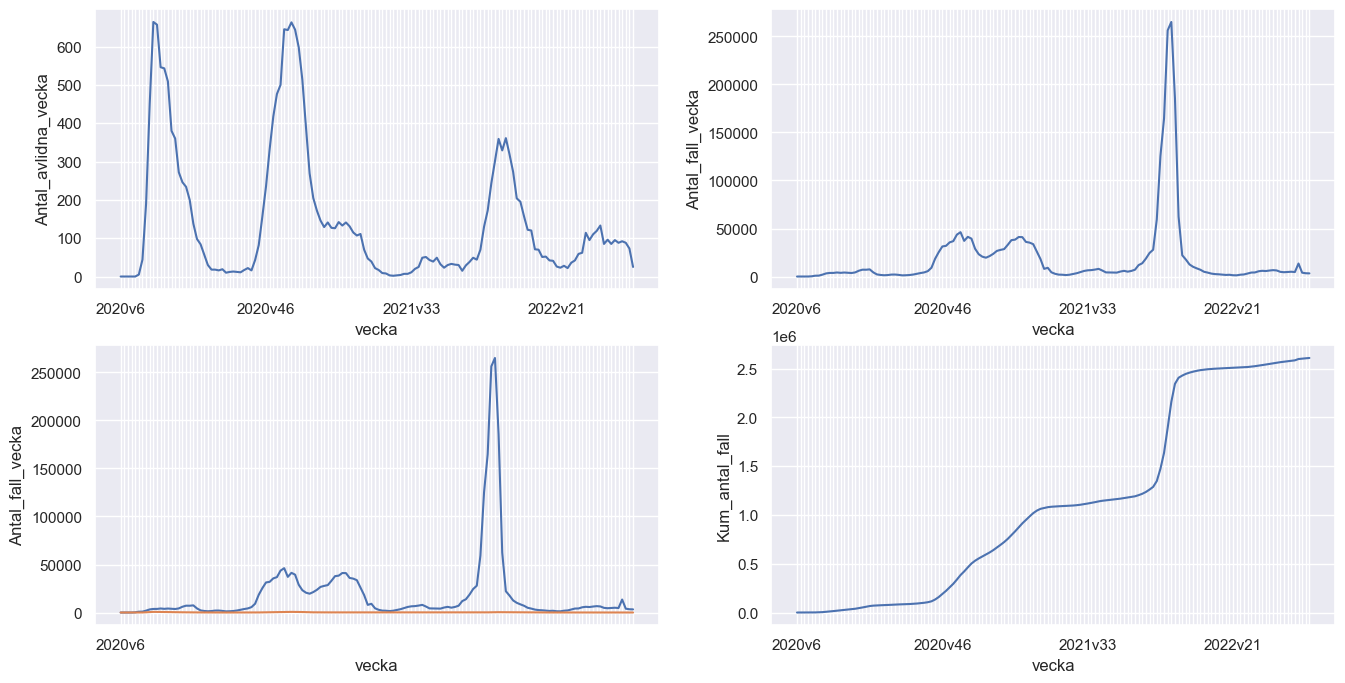

In [507]:
# Uppgift 1 backend

# a

#covid_week_data.info()   
#covid_week_data.describe()
#covid_week_data.value_counts()
#covid_week_data.head()
#covid_week_data.index
covid_week_data.columns


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# b

if not "vecka" in covid_week_data.columns:
    week = covid_week_data["år"].astype(str) + 'v' + covid_week_data["veckonummer"].astype(str)
    covid_week_data.insert(2, "vecka",  week)



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# c-f


fig, axes = plt.subplots(2,2, figsize=(16, 8))

deaths = sns.lineplot(x="vecka", y="Antal_avlidna_vecka", data=covid_week_data, ax=axes[0,0])
cases = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_fall_vecka", ax=axes[0,1])
deaths_and_cases = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_fall_vecka", ax=axes[1,0])
cases_and_deaths = sns.lineplot(data=covid_week_data, x="vecka", y="Antal_avlidna_vecka", ax=axes[1,0])
cumulative_cases = sns.lineplot(data=covid_week_data, x="vecka", y="Kum_antal_fall", ax=axes[1,1])


charts = [deaths, cases, deaths_and_cases, cases_and_deaths, cumulative_cases]

for chart in charts:
    for ind, label in enumerate(chart.get_xticklabels()):
        if ind % 40 == 0:  # var 40e vecka
            label.set_visible(True)
        else:
            label.set_visible(False)

sns.set()
plt.show()




In [505]:
x_axis = [covid_week_data["vecka"] for column in range(5)]
y_axis = [
    covid_week_data["Antal_avlidna_vecka"],
    covid_week_data["Antal_fall_vecka"],
    covid_week_data["Antal_avlidna_vecka"],
    covid_week_data["Antal_fall_vecka"],
    covid_week_data["Kum_antal_fall"] ]
labels = ["Antal avlidna per vecka","Antal fall per vecka", "Antal avlidna per vecka", "Antal fall per vecka", "Kum. antal fall"]


plotly_plots(5, "Nya, avlidna och kumulativa antal fall", x_axis, y_axis, labels, [3,4])


In [494]:
# Uppgift 2.a
vaxx_data.fillna(0, inplace=True)


nr_of_counties = vaxx_data["Län_namn"].nunique()
print(f"Antal län: {nr_of_counties}")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.b
nr_of_municipalities = vaxx_data["Kommun_namn"].nunique()
print(f"Antal län: {nr_of_municipalities}")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.c
befolkning = vaxx_data["Befolkning"].sum()
print(f"Sverige befolkning: {befolkning:,} st.")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.d

total_pop = 10_521_556
#Källa: https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/


lowest_ages = ['12-15', '16-17']
lowest_ages_query = vaxx_data.query("Ålder.isin(@lowest_ages)")


ages_12_to_17 = lowest_ages_query["Befolkning"].sum()
dataset_population = vaxx_data["Befolkning"].sum()


under_12 = total_pop - dataset_population
under_18 = under_12 + ages_12_to_17
pct_of_total_population = under_18 / total_pop


print(f"Befolkning under 18: {under_18:,}")


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Uppgift 2.e

age_group = vaxx_data.groupby("Ålder")

ages_grouped = age_group["Befolkning"].sum()
ages_group_df = ages_grouped.reset_index()


x_axis = [ages_group_df["Ålder"]]
y_axis = [ages_group_df["Befolkning"]]
labels = ["Åldrar"]

plotly_plots(1, f"Åldersfördelning, Sverige", x_axis, y_axis, labels)



Antal län: 21
Antal län: 290
Sverige befolkning: 9,092,790 st.
Befolkning under 18: 2,174,136


In [495]:
# Uppgift 2.f

# minst 1 dos per county
county_group = vaxx_data.groupby("Län_namn")
pct_atleast_1 = county_group["Andel minst 1 dos"].mean()*100
pct_atleast_1_df = pct_atleast_1.reset_index()


# andel 2 doser per län
vaxx_data["Andel 2 doser"] = vaxx_data.apply(lambda x: x['Andel minst 2 doser'] - x["Andel 3 doser"], axis=1)
county = vaxx_data.groupby("Län_namn")
pct_2 = county["Andel 2 doser"].mean()*100
pct_2_df = pct_2.reset_index()


# andel 3 doser per län
county_group = vaxx_data.groupby("Län_namn")
pct_3 = county_group["Andel 3 doser"].mean()*100
pct_3_df = pct_3.reset_index()


x_axis = [
    pct_atleast_1_df["Län_namn"], 
    pct_2_df["Län_namn"], 
    pct_3_df["Län_namn"]]

y_axis = [
    pct_atleast_1_df["Andel minst 1 dos"], 
    pct_2_df["Andel 2 doser"], 
    pct_3_df["Andel 3 doser"]]

labels = [
    "Minst 1 dos", 
    "Andel 2 doser", 
    "Andel 3 dos"]

plotly_plots(3, "Andel doser", x_axis, y_axis, labels)





In [ ]:
# 2.f
county_group = vaxx_data[["Län_namn","Andel minst 1 dos", "Andel 2 doser", "Andel 3 doser", "Andel 4 doser"]].groupby("Län_namn")

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

counties = ["Västra Götalands län", "Stockholms län"]
counties_query = vaxx_data.query("Län_namn.isin(@counties)")
counties_df = counties_query[["Län_namn", "Andel minst 1 dos", "Andel 2 doser", "Andel 3 doser", "Andel 4 doser"]]
counties_group_mean = counties_df.groupby("Län_namn").mean()*100
county_df = counties_group_mean.reset_index()

county_df = pd.melt(county_df, id_vars="Län_namn", var_name="Doser", value_vars=['Andel minst 1 dos', 'Andel 2 doser', 'Andel 3 doser', 'Andel 4 doser'] )


fig = px.bar(county_df, x='Län_namn', y='value', color='Doser', barmode='group', labels=dict(value="Procent", Län_namn="Län"), template='none')
fig.show()


### Uppgift 3
#### KPI #1  Vaccinerade efter åldersgrupp
* Först ut undersöktes andel vaccinerade efter åldersgrupp  
* Den mest vaccinerade åldersgruppen var 80-89 åringar, följt av 90 plusare och 70-79 åringar. Skiljde som mest .12% enheter emellan dom.
* Minst vaccinerade vuxna åldersgrupp var 18-29 åringar, följt av 30-39 åringar. Det skiljde 1.03% som mest mellan grupperna. 
* På tredje plats kom 40-49 åringar, 5.89% procenenheter fler än 18-29 åringar.




In [463]:
# Andel vaccinerade efter åldersgrupp

all_ages_group = vaxx_data.groupby(["Ålder"], as_index=False)

ages_mean = all_ages_group["Andel minst 1 dos"].mean()
ages_mean["Andel minst 1 dos"] *= 100


plotly_plots(1, "Vaccination efter åldersgrupp", [ages_mean["Ålder"]], [ages_mean["Andel minst 1 dos"]], labels=["Åldersfördelning"])



### KPI#2 Skillnad i andel vaccinerade mellan och inom mest och minst vaccinerade kommuner
* Skillnader i andel vaccinerade jämförs. Dom 5 mest och 5 minst vaccinerade kommunerna.  

* Skillnaden mellan den mest vaccinerade kommunan och minst vaccinerade kommunen var 22.7 procenheter.  

* Största skillnaden inom dom 5 minst vaccinerade kommunerna var 6 procentenheter.  

* Största skillnaden inom dom 5 mest vaccinerade kommunerna var 1.2 procentenheter.  

* Tre av dom minst vaccinerade kommunerna befinner sig i Skåne. Dom två minst vaccinerade kommunerna befinner sig i Stockholmsområdet  

* Dom två minst vaccinerade kommunerna är också dom befolkningsmässigt största i urvalet


In [ ]:
# 5 mest & minst vaccinerade kommuner

six_largest = vaccinated_municipalities.nlargest(5, ["Andel_dos1"])
six_largest = six_largest[["KnNamn", "Andel_dos1"]]
six_largest.insert(0, "Storlek", ["Mest" for n in range(len(six_largest))])

six_smallest = vaccinated_municipalities.nsmallest(5, ["Andel_dos1"])
six_smallest = six_smallest[["KnNamn", "Andel_dos1"]]
six_smallest.insert(0, "Storlek", ["Minst" for n in range(len(six_smallest))])

size_df = pd.concat([six_smallest, six_largest])
size_df["Andel_dos1"] *= 100


fig = px.bar(size_df, x='KnNamn', y='Andel_dos1', color='Storlek', barmode='group', labels=dict(Andel_dos1="Procent", KnNamn="Kommun", Storlek="Vaccinerade"), template='plotly', text="Andel_dos1")
fig.update_traces(texttemplate = "%{value:.1f}")
fig.update_xaxes(tickangle=-45)

fig.show()



### KPI#3 Ökad eller minskad dödlighet om dagen, per kvartal
* Här undersöks antal avlidna från första dödsfallet 11:e Mars 2020 till 25:e Oktober 2020. 

* Datum och kvartal för administration av vaccinationer 1-5 inkluderas.  

* Resultat visar dödsfall ökade från första peaken 8:e april 2020 till 28:e december 2020, innan vaccinationsdoser administrerades.  

* Efter vaccinationdoser 1-4 administrerades mellan Q4 2020 och Q1 2022 halverades dödsfallen nästan (46.3%).  



In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta 

deaths_per_quarter = {}
for year in [0,1,2]:
    counter = 1
    for month in ["01", "04", "07", "10" ]:
        date = datetime.strptime(f'202{year}-{month}-01 00:00:00', '%Y-%m-%d %H:%M:%S')

        mask = (daily_deaths["Datum_avliden"] >= date) & (daily_deaths["Datum_avliden"] < date + relativedelta(months=3))
        quarter = daily_deaths[mask]
        deaths = quarter["Antal_avlidna"].sum()
        deaths_per_quarter.update({f"Q{counter}_2{year}":deaths})
        counter += 1


fig = px.line(daily_deaths, x="Datum_avliden", y="Antal_avlidna", title="Avlidna om dagen per kvartal", template='plotly_dark', labels=dict(Antal_avlidna="Antal avlidna", Datum_avliden="Datum"))

fig.add_vrect(x0="2020-03-11", x1="2020-04-01", 
              annotation_text=f"{deaths_per_quarter['Q1_20']:,}", annotation_position="top right",
              fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-04-01", x1="2020-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_20']:,}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-07-01", x1="2020-10-01", annotation_text=f"{deaths_per_quarter['Q3_20']:,}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-10-01", x1="2021-01-01", annotation_text=f"{deaths_per_quarter['Q4_20']:,}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2021-01-01", x1="2021-04-01", annotation_text=f"{deaths_per_quarter['Q1_21']:,}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-04-01", x1="2021-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_21']:,}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-07-01", x1="2021-10-01", annotation_text=f"{deaths_per_quarter['Q3_21']:,}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-10-01", x1="2022-01-01", annotation_text=f"{deaths_per_quarter['Q4_21']:,}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2022-01-01", x1="2022-04-01", annotation_text=f"{deaths_per_quarter['Q1_22']:,}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-04-01", x1="2022-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_22']:,}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-07-01", x1="2022-10-01", annotation_text=f"{deaths_per_quarter['Q3_22']:,}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-10-01", x1="2022-10-26", annotation_text=f"{deaths_per_quarter['Q4_22']:,}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

fig.add_vline(x="2020-12-27", line_width=1, line_dash="dot")
fig.add_vline(x="2021-08-23", line_width=1, line_dash="dot")
fig.add_vline(x="2022-01-17", line_width=1, line_dash="dot")
fig.add_vline(x="2022-08-15", line_width=1, line_dash="dot")


fig.add_annotation(x="2020-12-27 00:00:00", y=99,
            text="Dos 1-2",
            showarrow=True,
            arrowhead=5,
            ax=30)

fig.add_annotation(x="2021-08-23 00:00:00", y=5, text="Dos 3", showarrow=True, arrowhead=5, ax=-20)
fig.add_annotation(x="2022-01-17 00:00:00", y=35, text="Dos 4", showarrow=True, arrowhead=5, ax=-20)
fig.add_annotation(x="2022-08-15 00:00:00", y=20, text="Dos 5", showarrow=True, arrowhead=5, ax=20)

fig.update_layout(height=600, width=1500)


fig.show()


    





### KPI #4: Statistisk signifikant dödlighet
* Jag undersökte totalt antal fall och avlidna efter åldersgrupp och statistisk signifikans.  

* Med statistisk signifikans menas en minsta andel nödvändig för att utesluta att något förekommer på grund av slump: minst 5%.  

* Resultaten visar att statistisk signifikant dödlighet endast gäller för åldrar 70+.

* Åldrar 70-79: 5.34%.

* Åldrar 80-89: 14.31%.

* Åldrar 90+: 20.32%.

* Närmaste åldersgruppen var 60-69 med < 1% dödlighet.

In [503]:
# Dödlighet


three_highest_mortality = total_per_age_group.nlargest(3, ["Dödlighet"])
highest_mortality_cols = three_highest_mortality[["Åldersgrupp", "Totalt_antal_fall", "Totalt_antal_avlidna", "Dödlighet"]]
highest_mortality_cols

fig = go.Figure(data=[go.Bar(
    name = "Antal fall", x = highest_mortality_cols["Åldersgrupp"], y = highest_mortality_cols["Totalt_antal_fall"]),

                      go.Bar(
    name = "Antal avlidna",
    x = highest_mortality_cols["Åldersgrupp"],
    y = highest_mortality_cols["Totalt_antal_avlidna"],
    text=[f"{number:.2f}%" for number in highest_mortality_cols["Dödlighet"]],
  )], 
  
  layout={"barmode":"overlay"})

fig.update_layout(template='plotly',
                  font=dict(
                    family="Courier New, monospace",
                    size=18,  # Set the font size here
                    color="black"),
                    title="Åldersgrupper med statistisk signifikant dödlighet",
                    legend=dict(orientation="h", title="", x=0.02, y=1.1),
                    )
fig.update_xaxes(tickvals=np.arange(3), ticktext=["Ålder: 90+", "Ålder: 80-89", "Ålder: 70-79"])

fig.show()
 


### Uppgift 4 Bonus

* Till uppgift 4 har jag valt att analysera dödlighet globalt.
* Jag börjar med att plotta antalet fall per dag under samma tidsperiod som Folkhälsomyndighetens dataset.
* Det går att se ett gemensamt mönster av högre dödsfall under slutet på Q4/början på Q1.
*
*





In [409]:
FHM_date = who_global_data.query("`Date_reported` >= '2020-03-11' and `Date_reported` <= '2022-10-26'")
daily_deaths_global = pd.pivot_table(FHM_date, index=["Date_reported"], values=["New_cases", "New_deaths"],aggfunc="sum")
daily_deaths_global = daily_deaths_global.reset_index()


deaths_per_quarter = {}
for year in [0,1,2]:
    counter = 1
    for month in ["01", "04", "07", "10" ]:
        start_date = f'202{year}-{month}-01'
        end_date = f'202{year}-{int(month)+3}-01' if month != "10" else f'202{year+1}-01-01'

        mask = (daily_deaths_global["Date_reported"] >= start_date) & (daily_deaths_global["Date_reported"] < end_date )
        quarter = daily_deaths_global[mask]
        deaths = quarter["New_deaths"].sum()
        deaths_per_quarter.update({f"Q{counter}_2{year}":deaths})
        counter += 1


fig = px.line(daily_deaths_global[["Date_reported", "New_deaths"]], x="Date_reported", y="New_deaths", template='plotly_dark', title="Avlidna om dagen per kvartal, globalt", labels=dict(New_deaths="Antal avlidna", Date_reported="Datum"))


fig.add_vrect(x0="2020-03-11", x1="2020-04-01", 
              annotation_text=f"{deaths_per_quarter['Q1_20']:,}", annotation_position="top right",
              fillcolor="grey", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-04-01", x1="2020-07-01", annotation_text=f"Q2:{deaths_per_quarter['Q2_20']:,} ", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-07-01", x1="2020-10-01", annotation_text=f"{deaths_per_quarter['Q3_20']:,}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2020-10-01", x1="2021-01-01", annotation_text=f"{deaths_per_quarter['Q4_20']:,}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2021-01-01", x1="2021-04-01", annotation_text=f"{deaths_per_quarter['Q1_21']:,}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-04-01", x1="2021-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_21']:,}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-07-01", x1="2021-10-01", annotation_text=f"{deaths_per_quarter['Q3_21']:,}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2021-10-01", x1="2022-01-01", annotation_text=f"{deaths_per_quarter['Q4_21']:,}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

fig.add_vrect(x0="2022-01-01", x1="2022-04-01", annotation_text=f"{deaths_per_quarter['Q1_22']:,}", annotation_position="top right", fillcolor="grey", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-04-01", x1="2022-07-01", annotation_text=f"Q2: {deaths_per_quarter['Q2_22']:,}", annotation_position="top right", fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-07-01", x1="2022-10-01", annotation_text=f"{deaths_per_quarter['Q3_22']:,}", annotation_position="top right", fillcolor="orange", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-10-01", x1="2022-10-26", annotation_text=f"{deaths_per_quarter['Q4_22']:,}", annotation_position="top right", fillcolor="brown", opacity=0.25, line_width=0)

fig.add_vline(x="2020-12-27", line_width=1, line_dash="dot")
fig.add_vline(x="2021-08-23", line_width=1, line_dash="dot")
fig.add_vline(x="2022-01-17", line_width=1, line_dash="dot")
fig.add_vline(x="2022-08-15", line_width=1, line_dash="dot")


fig.update_layout(height=600, width=1500)
fig.show()

#daily_deaths_global[["Date_reported", "New_deaths"]]

### Dödlighet i EU

* Inget av länder i EU hade statistisk signifikant dödlighet.

* I snitt dog cirka 0.8% av rapporterade Coronafall i EU.

* Dom tre länder med högst dödlighet var Bulgarien (2.96%), Ungern(2.24%) och Rumänien(2.06%).

* Dom tre med lägst dödlighet var Island (0.10%), Cypern (0.2%) och Danmark (0.23%)

* Hälften av länderna hade en dödlighet knappt 0.6% av alla rapporterade fall.

* Sverige hamnade på 9:e plats av 30 med en dödlighet på 0.78%. Ungefär 30% ovanför EU snittet.





In [408]:

print(country_cases_deaths.describe())

fig = px.choropleth(country_cases_deaths, color="Mortality", locations="countryterritoryCode", hover_name="countriesAndTerritories", scope="europe", hover_data=dict(countryterritoryCode=False, deaths=True,cases=True), labels=dict(Mortality = "Dödlighet (%)"))
fig.update_layout(height=600, width=800)
fig.show()

country_cases_deaths[["countriesAndTerritories", "Mortality"]].sort_values(by="Mortality", ascending=False)




              cases         deaths  Mortality
count  3.000000e+01      30.000000  30.000000
mean   5.811605e+06   38737.033333   0.791691
std    9.451385e+06   51503.175556   0.669867
min    2.054800e+04      86.000000   0.103331
25%    1.232336e+06    6134.750000   0.420767
50%    2.338534e+06   20459.000000   0.598233
75%    5.335422e+06   40590.500000   0.802556
max    3.661263e+07  178633.000000   2.962804


,countriesAndTerritories,Mortality
2,Bulgaria,2.962804
12,Hungary,2.238511
25,Romania,2.069224
23,Poland,1.907243
3,Croatia,1.372629
5,Czechia,0.999856
28,Spain,0.841220
26,Slovakia,0.808936
29,Sweden,0.783418
15,Italy,0.764707


### Dödlighet globalt

* Från ett global perspektiv kan vi se samma mönster av låg mortalitet. Endast tre av 231 länder rapporterade en statistiskt signifikant dödlighet.

* Syriska arab republiken: 5.5%. Sudan 7.9% och Yemen med ca. 18.1%.

* I genomsnitt låg dödligheten på 1.23% i världen.

* Hälften av världens länder rapporterade dödsfall i 0.83% av totala antal smittade.

* Två länder saknade data: Namibia & Nordkorea

* Av världens 771,8 miljoner covid fall resulterade 6,98 miljoner i dödsfall, eller cirka 0.9%

* Sveriges dödlighet låg 15.4% under världssnittet.

In [467]:
fig = px.choropleth(world, color="Mortality", locations="Alpha_3", hover_name="Country", hover_data=dict(Alpha_3=False, New_cases=True, New_deaths=True), labels=dict(Mortality = "Dödlighet (%)", New_cases = "Totalt antal fall", New_deaths="Totalt antal dödsfall"))
fig.update_layout(height=600, width=1200)
fig.show()

statistically_significant = world.query("Mortality >= 5")
print(statistically_significant[["Country", "Mortality"]])

print(world[["New_cases", "Mortality", ]].describe())


global_cases_and_deaths = who_global_data[["New_cases", "New_deaths"]].sum()
global_cases_and_deaths["World_mortality"] = global_cases_and_deaths["New_deaths"] / global_cases_and_deaths["New_cases"]*100

print(global_cases_and_deaths)



                  Country  Mortality
202                 Sudan   7.885237
206  Syrian Arab Republic   5.508246
232                 Yemen  18.074508
          New_cases   Mortality
count  2.330000e+02  231.000000
mean   3.311794e+06    1.228719
std    1.142910e+07    1.566530
min    0.000000e+00    0.000000
25%    2.519600e+04    0.388601
50%    1.914960e+05    0.832504
75%    1.276497e+06    1.636583
max    1.034368e+08   18.074508
New_cases          7.718209e+08
New_deaths         6.978175e+06
World_mortality    9.041184e-01
dtype: float64
